# 15.5 Homework
- Write a code to solve the minimum of 2D function with Monte Carlo method
- Write a code to solve the minimum of 2D function using the gradient decent method with variable step size by following the wikipedia page

### Gradient decent method with variable step size

- I test this method on the example function from lecture, f(x,y) = $\frac{1}{2}x^2 + \frac{1}{4}y^2$
- First, I plot the 3D image, and then I develop the optimization method below the plot and plot contour maps. On the contour maps, I will track the path of the gradient to the converged point.

<IPython.core.display.Javascript object>


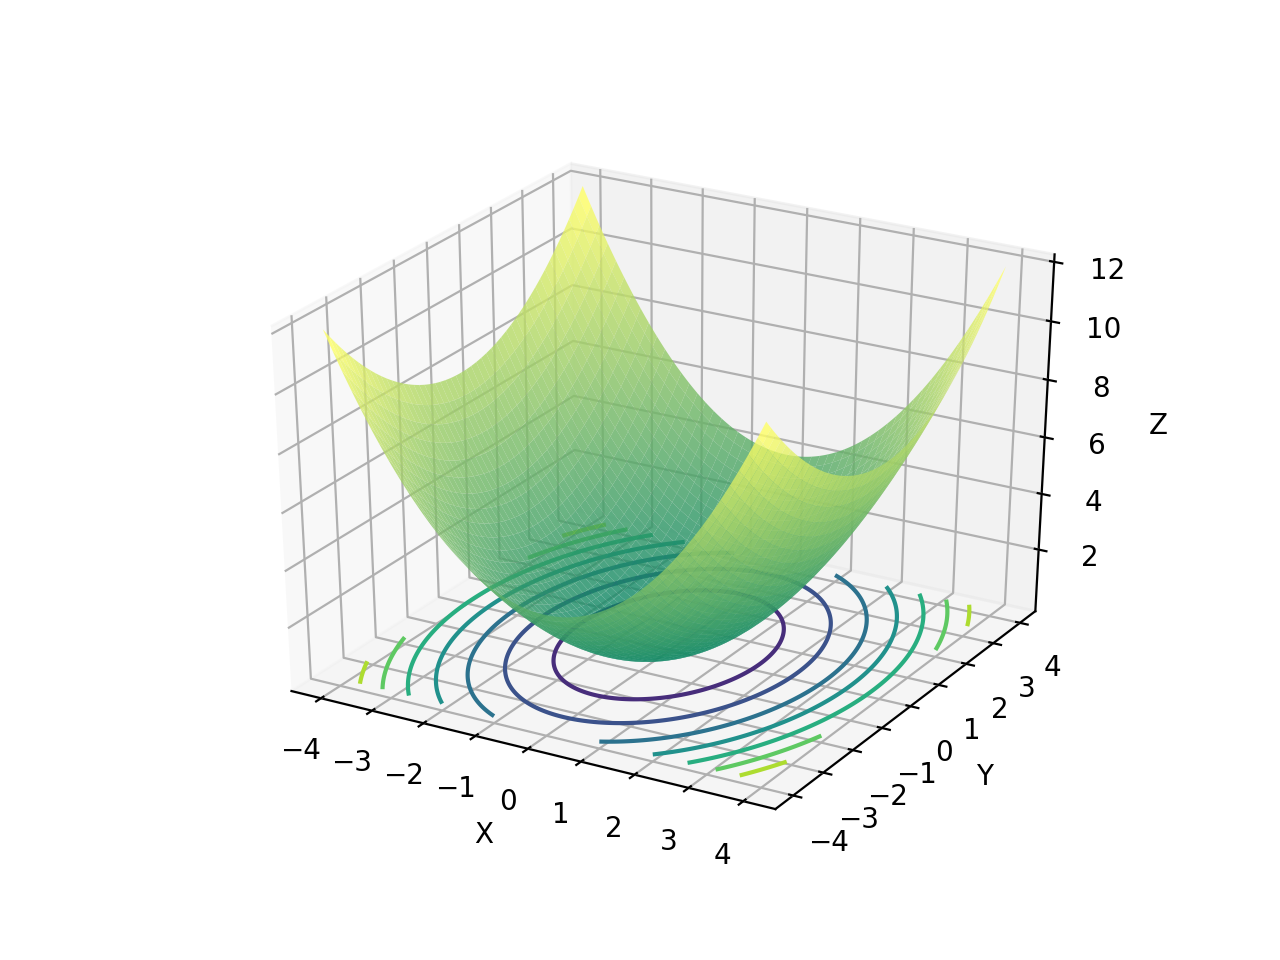

In [10]:
%matplotlib notebook

"""
Below is the 3D plot of the function we are interested in.
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -4, 4                          # range of x
y_min, y_max = -4, 4                          

#Define example function from class
def f2(x):
    return 1/2*x[0]**2 + 1/4*x[1]**2

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)

z = f2([x,y])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## 1 Monte Carlo Method

For the Monte Carlo method of finding the minimum, I define a function "MC" that generates random "N" x and y values in separate arrays. These are generated in the range of interest on our contour map, in this case from -4 to 4. I then define a function "find_nearest" that will find and return the value in each array that is nearest to the true minimum of the function. On the contour map, this position is indicated by the yellow crosshair.

<IPython.core.display.Javascript object>


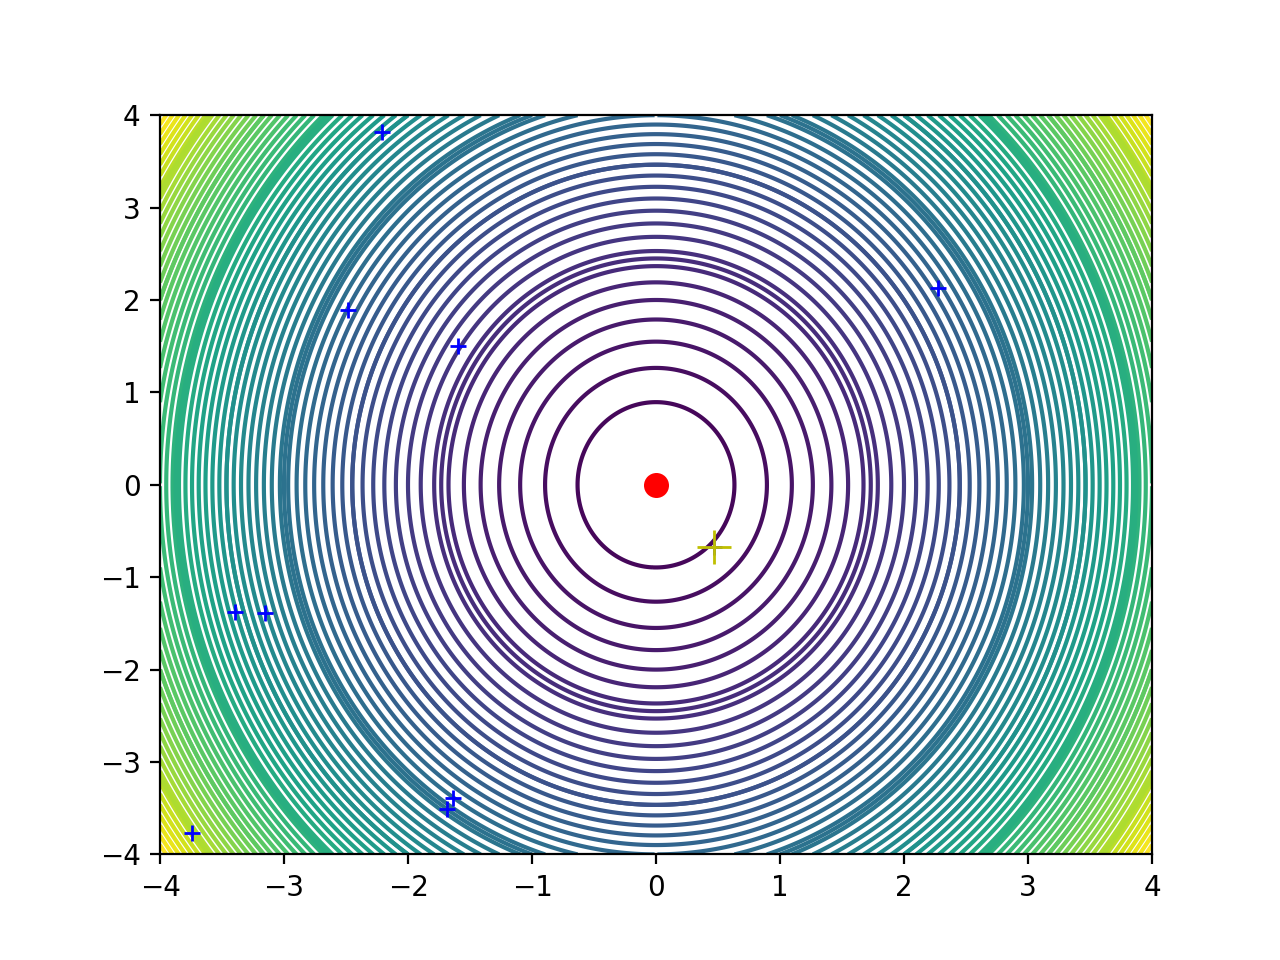

Minimum from Monte Carlo:  0.4679925142943002 , -0.6686670460117252
Number of iterations:  10


In [2]:

x_min, x_max = -4, 4                          # range of x
y_min, y_max = -4, 4                          

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

def MC(N):
    
    x_min, x_max = -4, 4
    y_min, y_max = -4, 4
    xpos = []
    ypos = []
    for i in range(N):
        xpos.append(x_min+np.random.random()*(x_max-x_min))
        ypos.append(y_min+np.random.random()*(x_max-x_min))
    
    return xpos, ypos

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f2([x,y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

"""
Monte Carlo method using 10 random coordinate generations.
"""
N = 10
mcx, mcy = MC(N)
mcxmin, mcymin = find_nearest(mcx, 0), find_nearest(mcy, 0)
x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(mcx, mcy, 'b+')
plt.plot(mcxmin, mcymin, 'y+', markersize=12 )
plt.plot(0, 0, 'ro', markersize=8)
#plt.plot(x0, y0, 'ro')
plt.show()
print('Minimum from Monte Carlo: ', mcxmin, ',', mcymin)
print('Number of iterations: ', N)

<IPython.core.display.Javascript object>


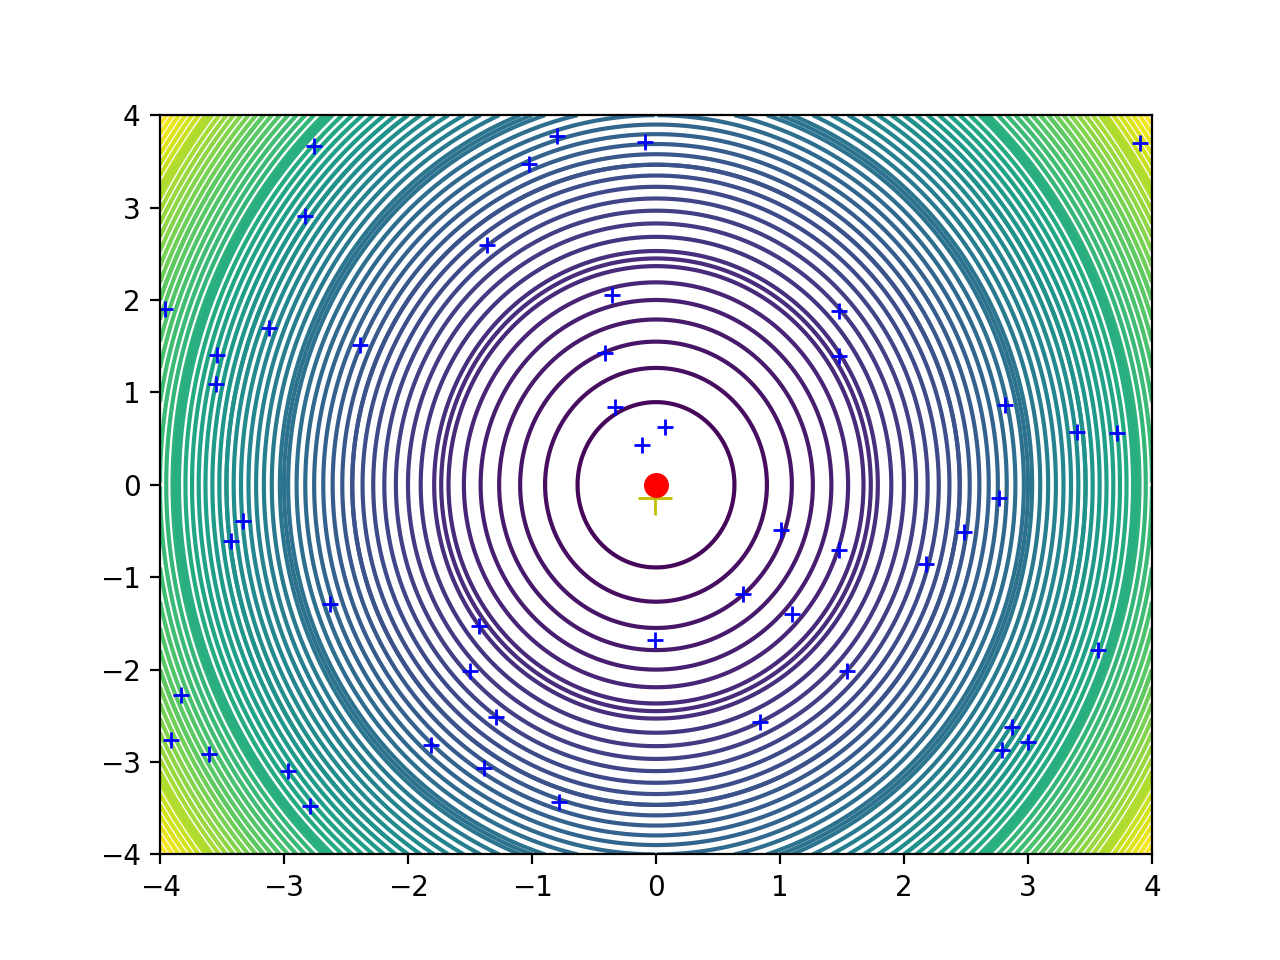

Minimum from Monte Carlo:  -0.010903860539100307 , -0.14353216140544767
Number of iterations:  50


In [3]:
"""
Monte Carlo method using 50 random coordinate generations.
"""

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f2([x,y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

N = 50
mcx, mcy = MC(N)
mcxmin, mcymin = find_nearest(mcx, 0), find_nearest(mcy, 0)
x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(mcx, mcy, 'b+')
plt.plot(mcxmin, mcymin, 'y+', markersize=12 )
plt.plot(0, 0, 'ro', markersize=8)
#plt.plot(x0, y0, 'ro')
plt.show()
print('Minimum from Monte Carlo: ', mcxmin, ',', mcymin)
print('Number of iterations: ', N)

<IPython.core.display.Javascript object>


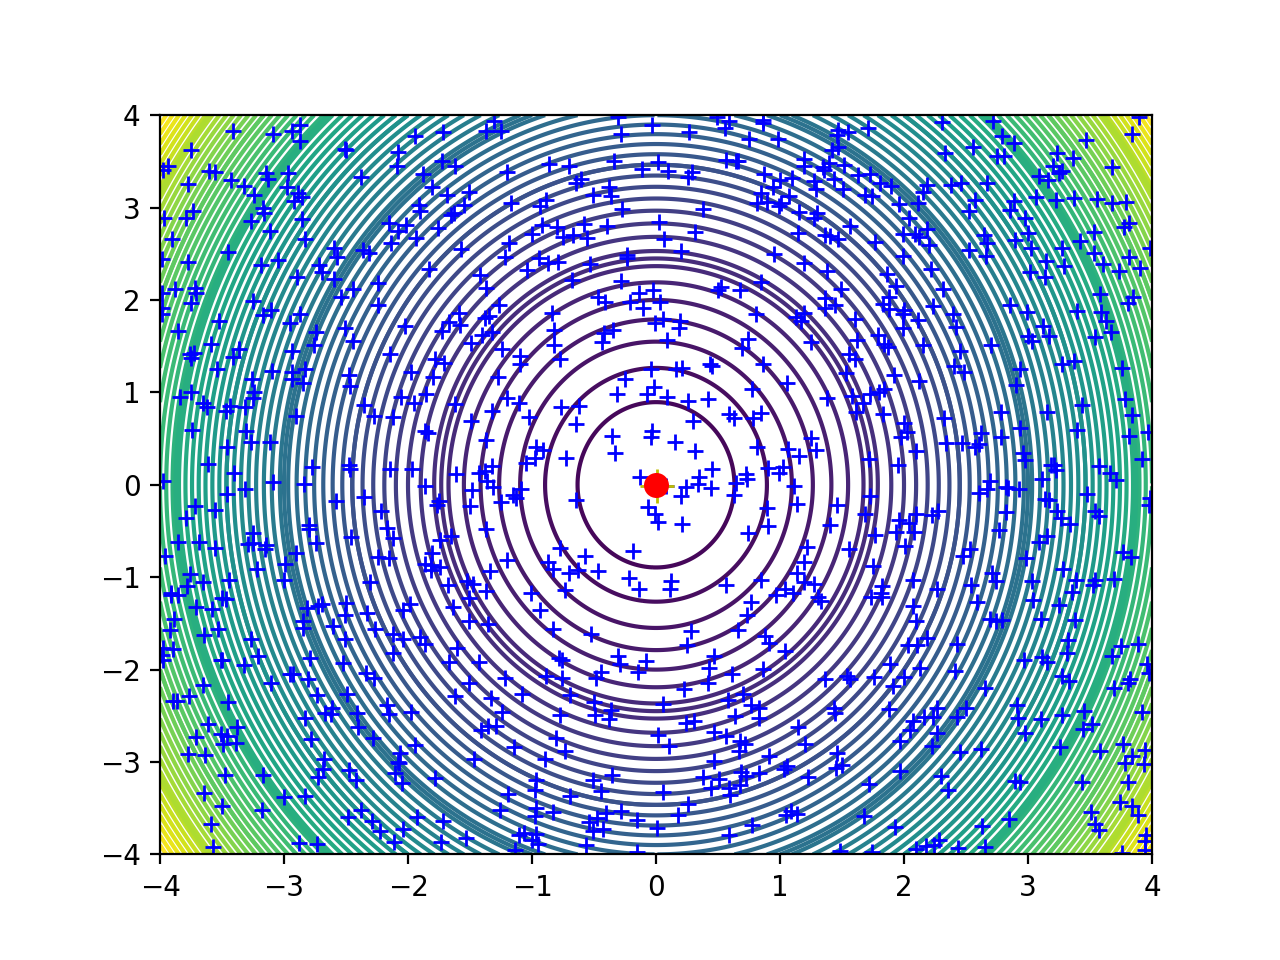

Minimum from Monte Carlo:  0.007404531187535035 , -0.009509537138963076
Number of iterations:  1000


In [9]:
"""
Monte Carlo method using 1000 random coordinate generations.
"""

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f2([x,y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


N = 1000
mcx, mcy = MC(N)
mcxmin, mcymin = find_nearest(mcx, 0), find_nearest(mcy, 0)
x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(mcx, mcy, 'b+')
plt.plot(mcxmin, mcymin, 'y+', markersize=12 )
plt.plot(0, 0, 'ro', markersize=8)
#plt.plot(x0, y0, 'ro')
plt.show()
print('Minimum from Monte Carlo: ', mcxmin, ',', mcymin)
print('Number of iterations: ', N)





As we can see from the above contour maps, the Monte Carlo method produces a more accurate minimum value for the function as we increase the number of random points generated, as expected. Thus, in order to get closer to the true minimum value, the Monte Carlo method requires many iterations - much more than using the gradient descent method with variable step size as we will see below.





## 2 Gradient descent method w/ variable step size

Now I define the derivative function to calculate the derivatives to be used in my minimize_var function. These calculations are defined as in class, by the mathematics below.

$$ \gamma_n = \frac{(x_n-x_{n-1})^T [\nabla f(x_n) - \nabla f(x_{n-1})]} {||\nabla f(x_n) - \nabla f(x_{n-1})||^2} $$

where $\gamma_n$ is the variable step size

and the gradient descent defined by: $$x_{n+1} = x_n - \gamma f'(x_n)$$



In [5]:
# variable stepwidth
def derivative2(f, xy, d=0.001):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize_var(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    for i in range(N):
        
        df_now = derivative2(f2, x_now) 
        
        if x_prev is None:
            dx = 0.01
        else:
            df_prev = derivative2(f2, x_prev)
            dd = df_now - df_prev
            dx = np.dot(x_now - x_prev, dd) / (np.linalg.norm(dd))**2
        x_next = x_now - df_now*dx
        
        #print("step:    ", f(x_now), f(x_next))
        if abs(f(x_next)-f(x_now))<1e-4:
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

<IPython.core.display.Javascript object>


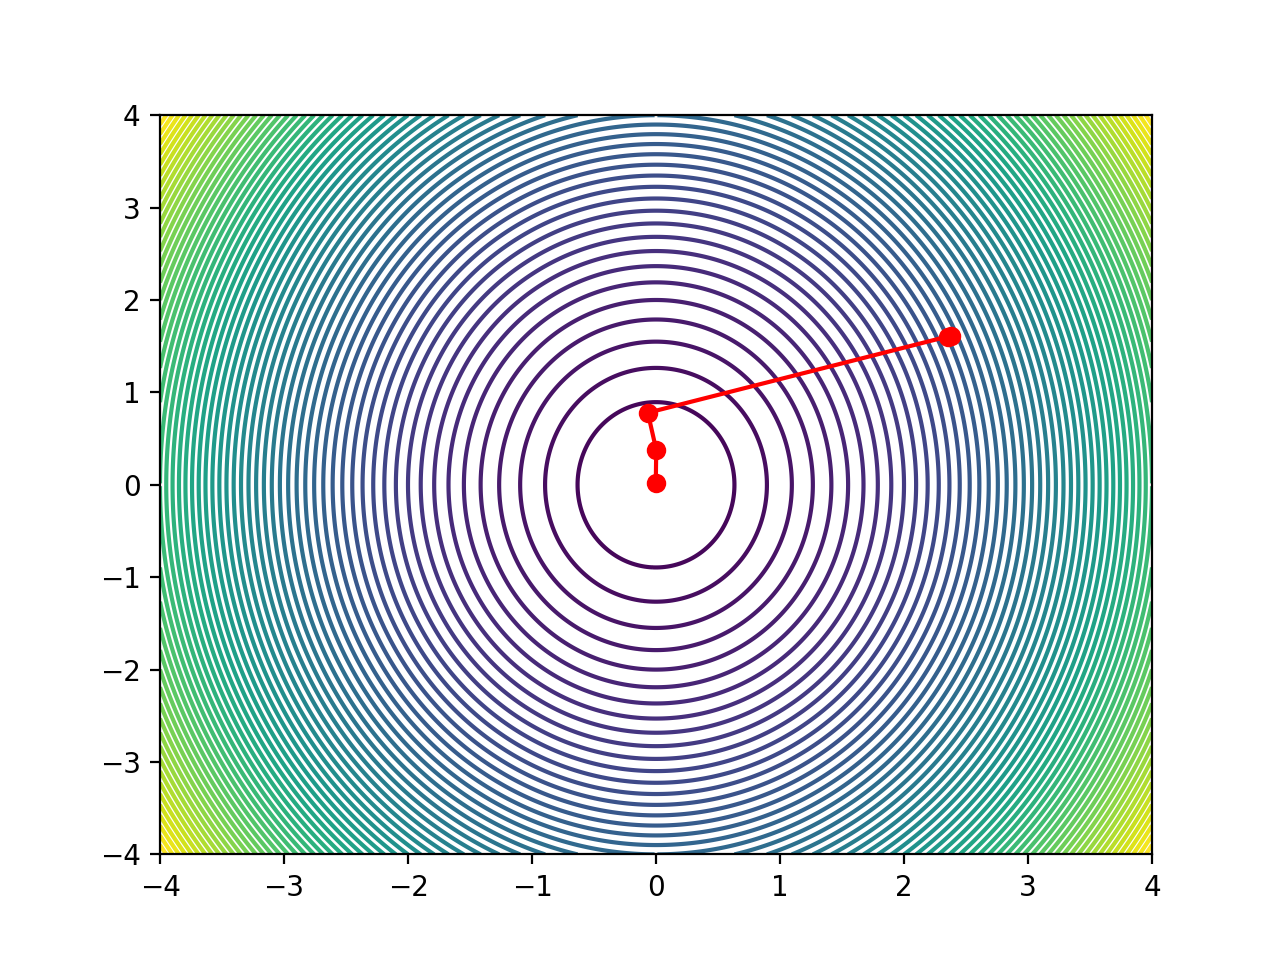

Converged =  True
Minimum =   9.545487166424351e-05
Number of iterations:   5
XY Coordinates of starting position:  [2.37576436 1.61278874]
Z value of starting position:  3.472400024805246
XY Coordinates of minimum:  [-0.001671    0.01939678]
Z value of minimum:  9.545487166424351e-05
True Z value of minimum:  0.0


In [7]:
x0 = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_var(f2, x0)
x,y = np.meshgrid(nx,ny)
z = f2([x,y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.2)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
#plt.scatter(x_hist[-1,0], x_hist[-1,1], 'b')
plt.show()

print('Converged = ', converged)
print('Minimum =  ', f_min,)
print('Number of iterations:  ', len(x_hist))
print('XY Coordinates of starting position: ', x_hist[0])
print('Z value of starting position: ', f2(x_hist[0]))
print('XY Coordinates of minimum: ', x_hist[-1])
print('Z value of minimum: ', f2(x_hist[-1]))
print('True Z value of minimum: ', f2([0,0]))